In [1]:
import numpy as np
import h5py
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from collections import namedtuple
import os

sns.set_style("whitegrid")
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
%matplotlib inline

# Comparing post-analysis reweighting

This notebook contains a comparison of the post-analysis reweighting implementations on Adam's NaCl data

In [3]:
# Specify brute force values
BFData = namedtuple('BFData', 'popA, popB, mfptAB, mfptBA')

bfdata = {'22bins': BFData(0.0446792766036, 0.420401897991, 5*87.9338993329, 5*1124.62037599),
          '5bins': BFData(0.0473507632462, 0.752119739401, 5*67.8681506849, 5*1073.40068493)}


In [4]:
def plot_ernesto_data(ax, simname, nbins, itemname, calctype, basedir, color, linestyle='-'):  
    '''matrixPopB-NaCl-5bins-fromDissRegularSM.dat'''
    itemnames = {'popa':'PopA', 'popb':'PopB', 'mfptab':'MFPTAB', 'mfptba':'MFPTBA'}
    
    args = {'simname': simname,
            'itemname': itemnames[itemname.lower()],
            'calctype': calctype,
            'nbins': nbins}

    file_name = os.path.join(basedir, 'NaCl_{}'.format(simname),
                        '{calctype}{itemname}-NaCl-{nbins}bins-{simname}.dat'.format(**args))
    
    data = np.genfromtxt(file_name, missing_values={0:None}, filling_values={0:0.0})
    t = np.arange(1, data.shape[0]+1)
    assert t.shape == data.shape
    ax.plot(t, data, ls=linestyle, label='Ernesto')
    
    return t, data

    
def plot_reference(ax, nbins, itemname, tlen, color, linestyle='-'):
    itemnames = {'popa':0, 'popb':1, 'mfptab':2, 'mfptba':3}
    x = bfdata['{}bins'.format(nbins)][itemnames[itemname.lower()]]
    data = x * np.ones(tlen)
    t = np.arange(1,data.shape[0]+1)
    ax.plot(t, data, color=color, ls=linestyle, lw=1.5, label='BF ref')
    

def plot_josh_data(ax, dt, nbins, h5filename, itemname, linestyle='-'):
    with h5py.File(h5filename, 'r') as f:
        sn2indx = {'a': 0, 'b': 1}
        cfe = f['conditional_flux_evolution']
        spe = f['color_prob_evolution']
        t = cfe['iter_stop'][:, 0, 0]
        
        if itemname.lower().startswith('mfpt'):
            
            s1str, s2str = itemname.lower()[-2:]
            s1 = sn2indx[s1str]
            s2 = sn2indx[s2str]
            
            flux = cfe['expected'][:, s1, s2]
            P = spe[:,s1]
            
            # Convert data from flux to MFPT
            ii = np.where((P == 0.0) | (flux == 0.0))
            data = dt * P / flux
            data[ii] = 0.0
            
            ax.plot(t, data, ls=linestyle, label='Josh')
        elif itemname.lower().startswith('pop'):
            state_str = itemname.lower()[-1]
            state = sn2indx[state_str]
            data = f['state_prob_evolution'][:,state]
            
            ax.plot(t, data, ls=linestyle, label='Josh')
        elif itemname.lower().startswith('flux'):
            s1str, s2str = itemname.lower()[-2:]
            s1 = sn2indx[s1str]
            s2 = sn2indx[s2str]
            
            flux = cfe['expected'][:, s1, s2]
            data = flux
            
            ax.plot(t, flux, ls=linestyle, label='Josh')
        elif itemname.lower().startswith('colorpop'):
            state_str = itemname.lower()[-1]
            state = sn2indx[state_str]
            P = spe[:,state]
            ax.plot(t, P, ls=linestyle, label='Josh')
            data = P
            
    return t, data
            

## 22 bins: Regular Split-Merge Starting from the Dissociated State

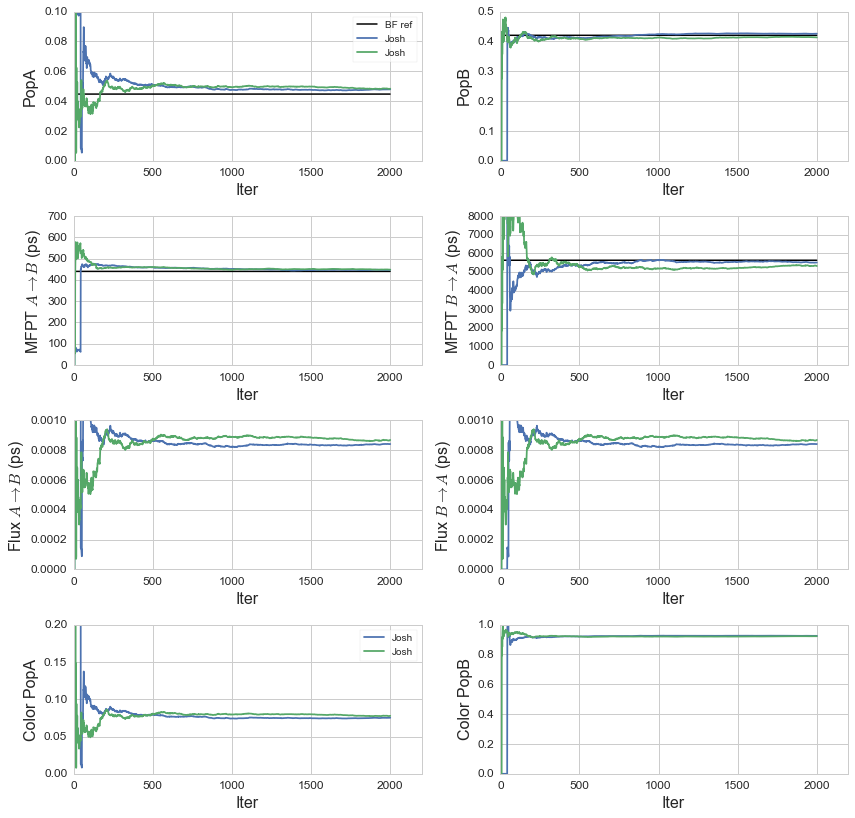

In [8]:
fig = plt.figure(figsize=(12,15))

ax = fig.add_subplot(521)
plot_reference(ax, 22, 'popa', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'popa', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5','popb')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5','popb')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 0.1])
ax.set_xlabel('Iter')
ax.set_ylabel('PopA')
ax.legend()

ax = fig.add_subplot(522)
plot_reference(ax, 22, 'popb', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'popb', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5','popa')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5','popa')

ax.set_xlim([0, 2200])
#ax.set_ylim([0.3, 0.6])
ax.set_xlabel('Iter')
ax.set_ylabel('PopB')

ax = fig.add_subplot(523)
plot_reference(ax, 22, 'mfptab', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'mfptab', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5', 'mfptba')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5', 'mfptba')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 700])

ax.set_xlabel('Iter')
ax.set_ylabel(r'MFPT $A{\rightarrow}B$ (ps)')

ax = fig.add_subplot(524)
plot_reference(ax, 22, 'mfptba', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'mfptba', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5', 'mfptab')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5', 'mfptab')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 8000])
ax.set_xlabel('Iter')
ax.set_ylabel(r'MFPT $B{\rightarrow}A$ (ps)')

ax = fig.add_subplot(525)
#plot_reference(ax, 22, 'mfptab', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'mfptab', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5', 'fluxba')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5', 'fluxba')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 0.001])

ax.set_xlabel('Iter')
ax.set_ylabel(r'Flux $A{\rightarrow}B$ (ps)')

ax = fig.add_subplot(526)
#plot_reference(ax, 22, 'mfptba', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'mfptba', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5', 'fluxab')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5', 'fluxab')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 0.001])
ax.set_xlabel('Iter')
ax.set_ylabel(r'Flux $B{\rightarrow}A$ (ps)')


ax = fig.add_subplot(527)
#plot_reference(ax, 22, 'colorpopa', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'popa', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5','colorpopb')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5','colorpopb')

ax.set_xlim([0, 2200])
ax.set_ylim([0, 0.2])
ax.set_xlabel('Iter')
ax.set_ylabel('Color PopA')
ax.legend()

ax = fig.add_subplot(528)
#plot_reference(ax, 22, 'colorpopb', 2000, 'k')
#plot_ernesto_data(ax, 'fromDissRegularSM', 22, 'popb', 'matrix', 'NaCl', 'b')
plot_josh_data(ax, 5, 22, '01.EQ.NO.RW.BOUND/kinrw.h5','colorpopa')
plot_josh_data(ax, 5, 22, '06.EQ.NO.RW.COLOR.BOUND/kinrw.h5','colorpopa')

ax.set_xlim([0, 2200])
#ax.set_ylim([0.3, 0.6])
ax.set_xlabel('Iter')
ax.set_ylabel('Color PopB')


plt.tight_layout()
#plt.suptitle('22 bins: Regular Split-Merge Starting from the Dissociated State', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('22bins.png')